In [1]:
import pandas as pd
import torch
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [11]:
from torch.distributions.gamma import Gamma
torch.manual_seed(0)
obese_weights = Gamma(concentration=20,rate=0.1).rsample((100,))
non_obese_weights = Gamma(concentration=20,rate=0.2).rsample((200,))

In [12]:
obese_df = pd.DataFrame(obese_weights, columns=["weight"])
obese_df["obese"] = True
non_obese_df = pd.DataFrame(non_obese_weights, columns=["weight"])
non_obese_df["obese"] = False
df = pd.concat([obese_df, non_obese_df], axis=0, ignore_index=True)
csv_path = "../../tests/expected/TestLogisticRegressionApp/mice.csv"
df.to_csv(csv_path, index=False)
df

,weight,obese
0,273.226562,True
1,183.938828,True
2,152.385315,True
3,140.934738,True
4,166.463028,True
...,...,...
295,101.598389,False
296,82.611061,False
297,104.013634,False
298,102.232864,False


In [13]:
fig = px.box(df, x="weight", y="obese", color="obese", points="all")
fig.update_layout(
    showlegend=False,
)
fig.show()

In [14]:
from fastapp.examples.logistic_regression import LogisticRegressionApp

app = LogisticRegressionApp()

In [15]:
learner = app.train(csv=csv_path, x="weight", y="obese", epochs=100, learning_rate=1e-2)

Building dataloaders

Building model

Building learner

Setting floating-point precision of learner to 16 bit

--------------------------------------------------------------------------

Please cite these references if using this app in an academic publication:

[1] J. Howard and S. Gugger. Deep Learning for Coders with Fastai and Pytorch: AI Applications Without a PhD. O'Reilly Media, Incorporated, 2020. ISBN 9781492045526. URL: https://books.google.no/books?id=xd6LxgEACAAJ.
[2] Jeremy Howard and Sylvain Gugger. Fastai: A Layered API for Deep Learning. Information, 2020. URL: https://www.mdpi.com/2078-2489/11/2/108, doi:10.3390/info11020108.
[3] Robert Turnbull and Jonathan Garber. FastApp: A wrapper for fastai projects to create easy command-line inferfaces and manage hyper-parameter tuning. JOSS, 2022 (forthcoming).



--------------------------------------------------------------------------

epoch,train_loss,valid_loss,logit_accuracy,logit_f1,time
0,1.364746,1.187492,0.683333,0.000000,00:01
1,1.260636,1.060322,0.683333,0.000000,00:00
2,1.175401,0.934218,0.616667,0.000000,00:01
3,1.097060,0.850980,0.183333,0.000000,00:00
4,1.038751,0.878878,0.316667,0.479760,00:00
5,1.007430,0.944562,0.316667,0.479760,00:00
6,0.989850,0.897637,0.316667,0.479760,00:00
7,0.964246,0.837636,0.050000,0.034568,00:01
8,0.944998,0.851590,0.333333,0.000000,00:00
9,0.930303,0.831948,0.100000,0.156078,00:00


Better model found at epoch 0 with logit_f1 value: 0.0.
Better model found at epoch 4 with logit_f1 value: 0.4797603765511339.
Better model found at epoch 29 with logit_f1 value: 0.5261261261261262.
Better model found at epoch 30 with logit_f1 value: 0.7820426487093154.
Better model found at epoch 31 with logit_f1 value: 0.8857971014492755.
Better model found at epoch 36 with logit_f1 value: 0.9333333333333333.
Better model found at epoch 54 with logit_f1 value: 0.9575757575757575.


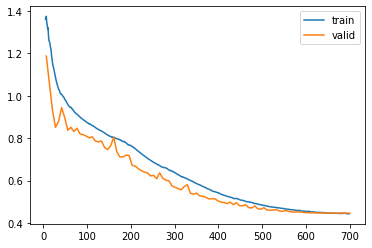

In [16]:
learner.recorder.plot_loss()

In [17]:
x = torch.linspace(df["weight"].min(), df["weight"].max(), 100)
x

tensor([ 48.8466,  51.8481,  54.8495,  57.8510,  60.8524,  63.8538,  66.8553,
         69.8567,  72.8581,  75.8596,  78.8610,  81.8624,  84.8639,  87.8653,
         90.8668,  93.8682,  96.8696,  99.8711, 102.8725, 105.8739, 108.8754,
        111.8768, 114.8782, 117.8797, 120.8811, 123.8825, 126.8840, 129.8854,
        132.8868, 135.8883, 138.8897, 141.8912, 144.8926, 147.8940, 150.8955,
        153.8969, 156.8983, 159.8998, 162.9012, 165.9026, 168.9041, 171.9055,
        174.9070, 177.9084, 180.9098, 183.9113, 186.9127, 189.9141, 192.9156,
        195.9170, 198.9184, 201.9199, 204.9213, 207.9227, 210.9242, 213.9256,
        216.9271, 219.9285, 222.9299, 225.9314, 228.9328, 231.9342, 234.9357,
        237.9371, 240.9385, 243.9400, 246.9414, 249.9428, 252.9443, 255.9457,
        258.9471, 261.9486, 264.9500, 267.9515, 270.9529, 273.9543, 276.9558,
        279.9572, 282.9586, 285.9601, 288.9615, 291.9630, 294.9644, 297.9658,
        300.9673, 303.9687, 306.9701, 309.9716, 312.9730, 315.97

In [18]:
logits = learner.model(x.unsqueeze(dim=-1))

In [19]:
from torch import nn

In [20]:
y = nn.Sigmoid()(logits)

In [21]:
y.squeeze()

tensor([0.3065, 0.3123, 0.3182, 0.3241, 0.3301, 0.3362, 0.3423, 0.3485, 0.3547,
        0.3609, 0.3672, 0.3736, 0.3800, 0.3864, 0.3929, 0.3995, 0.4060, 0.4126,
        0.4192, 0.4259, 0.4326, 0.4393, 0.4460, 0.4527, 0.4595, 0.4663, 0.4731,
        0.4799, 0.4867, 0.4935, 0.5003, 0.5071, 0.5139, 0.5207, 0.5275, 0.5343,
        0.5411, 0.5479, 0.5546, 0.5613, 0.5680, 0.5747, 0.5814, 0.5880, 0.5946,
        0.6011, 0.6076, 0.6141, 0.6206, 0.6270, 0.6333, 0.6396, 0.6459, 0.6521,
        0.6582, 0.6643, 0.6704, 0.6764, 0.6823, 0.6882, 0.6940, 0.6998, 0.7055,
        0.7111, 0.7167, 0.7222, 0.7276, 0.7330, 0.7383, 0.7435, 0.7487, 0.7538,
        0.7588, 0.7638, 0.7687, 0.7735, 0.7782, 0.7829, 0.7875, 0.7920, 0.7965,
        0.8008, 0.8052, 0.8094, 0.8136, 0.8177, 0.8217, 0.8257, 0.8295, 0.8334,
        0.8371, 0.8408, 0.8444, 0.8480, 0.8514, 0.8549, 0.8582, 0.8615, 0.8647,
        0.8679], grad_fn=<SqueezeBackward0>)

In [28]:
import plotly.graph_objects as go
import numpy as np
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df["weight"], y=df["obese"]*1+np.random.normal(scale=0.02, size=len(df)), mode='markers')
)
fig.add_trace(
    go.Scatter(x=x.squeeze().detach().numpy(), y=y.squeeze().detach().numpy())
)
fig.update_layout(
    yaxis_range=[-0.1,1.1],
)
fig

In [29]:
for x in learner.model.parameters():
    print(x)

Parameter containing:
tensor([[0.0091]], requires_grad=True)
Parameter containing:
tensor([-1.2604], requires_grad=True)


In [ ]:
from torch import nn

In [ ]:
loss = nn.BCELoss()

In [ ]:
loss(torch.FloatTensor([0.999]),torch.FloatTensor([1.0]))

In [ ]:
nn.BCEWithLogitsLoss()(torch.FloatTensor([-20]),torch.FloatTensor([0.0]))

In [ ]:
learner = app.learner(csv=csv_path, x="weight", y="obese")

In [ ]:
batch = learner.dls.train.one_batch()

In [ ]:
batch[0].shape

In [ ]:
batch[1].dtype

In [ ]:
import torch
from torch import nn

In [ ]:
loss = nn.BCEWithLogitsLoss()

In [ ]:
x = torch.Tensor([-1,1.5])
y = torch.Tensor([False,False])

In [ ]:
loss(x,y)

In [ ]:
y.dtype

In [ ]:
from fastai.metrics import accuracy, APScoreBinary

In [ ]:
APScoreBinary()(x,y)

In [ ]:
def logit_accuracy(predictions, target):
    return ((predictions > 0.0) == (target > 0.5)).float().mean()
    predicted_positives = (predictions > 0.0)
    predicted_negatives = ~predicted_positives
    actual_positives = (target > 0.5)
    actual_negatives = ~actual_positives
    true_positives = (predicted_positives == actual_positives).sum()
    true_negatives = (predicted_negatives == actual_negatives).sum()

    print()

    return (true_positives + true_negatives)/(actual_positives.sum() + actual_negatives.sum())

In [ ]:
logit_accuracy

In [ ]:
~(torch.Tensor([0.2, -0.2]) > 0.0)

In [ ]:
from sklearn.metrics import f1_score
def logit_f1(logits, target):
    predictions = (logits > 0.0)
    target_binary = (target > 0.5)
    return f1_score(predictions.cpu(), target_binary.cpu())


In [ ]:
logits = torch.Tensor([-1,1.5,1.0, 0.5, -0.1, -0.1, -0.1])
actual = torch.Tensor([False,True, True, True, True, True, False])

In [ ]:
logit_accuracy(logits,actual)

In [ ]:
logit_f1(logits,actual)

In [ ]:
accuracy(x,y)